# Vertical and Temporal Profiles in emiproc

This tutorial shows basic handling of vertical and temporal profiles in emiproc.

- loading profiles from a file
- plotting profiles
- saving profiles to a file

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np

import matplotlib.pyplot as plt

import emiproc
from emiproc.profiles.temporal_profiles import (
    TemporalProfile,
    DailyProfile,
    WeeklyProfile,
    MounthsProfile,
    create_time_serie,
    from_csv,
    from_yaml,
    to_yaml
)
from emiproc.profiles import vertical_profiles 

## Vertical profiles

In [6]:
# Load from csv

copernicus_profiles_dir = emiproc.FILES_DIR / "profiles" / "copernicus"
profiles, cat_sub = vertical_profiles.from_csv(
    copernicus_profiles_dir / "vertical.csv"
)   

Cannot find 'Substance' header in file=WindowsPath('C:/Users/coli/Documents/emiproc/files/profiles/copernicus/vertical.csv').
All substances will be treated the same way.


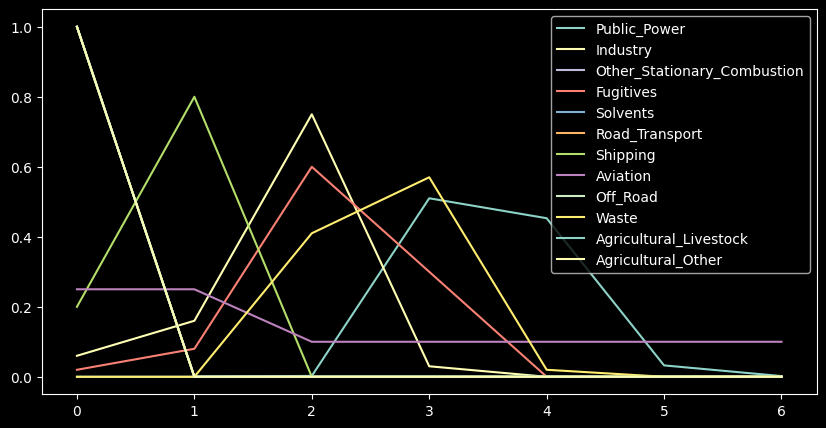

In [8]:
# Plot the profiles
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
for name, profile in zip(cat_sub, profiles.ratios):
    ax.plot(profile, label=name)
ax.legend()

## Time profiles

Cannot find 'Substance' header in file=WindowsPath('C:/Users/coli/Documents/emiproc/files/profiles/copernicus/hour_in_day.csv').
All substances will be treated the same way.
Cannot find 'Substance' header in file=WindowsPath('C:/Users/coli/Documents/emiproc/files/profiles/copernicus/day_in_week.csv').
All substances will be treated the same way.
Cannot find 'Substance' header in file=WindowsPath('C:/Users/coli/Documents/emiproc/files/profiles/copernicus/month_in_year.csv').
All substances will be treated the same way.


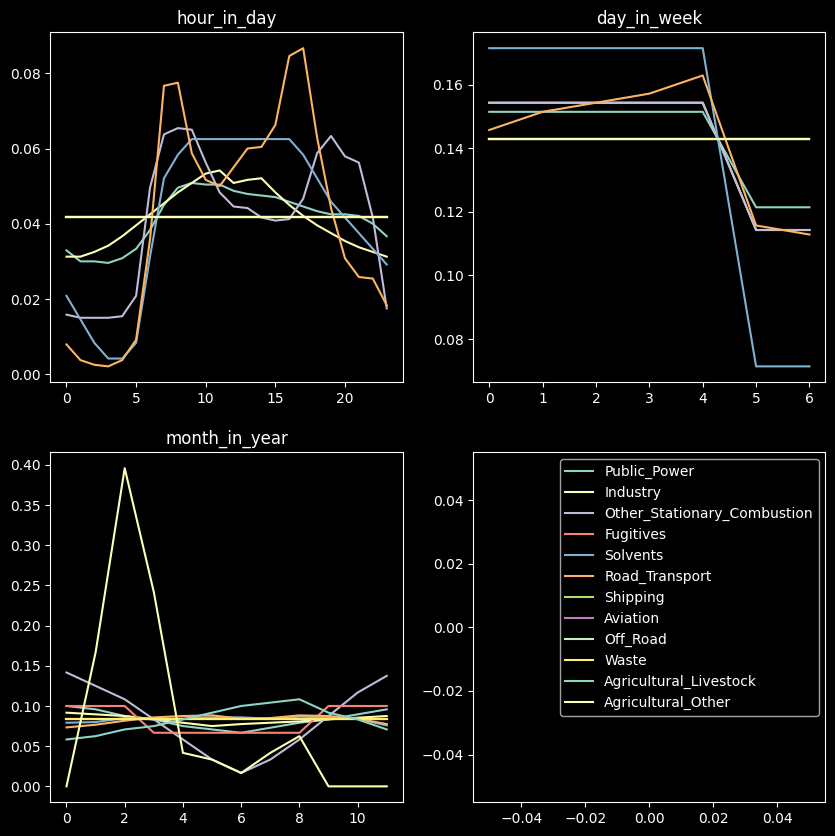

In [14]:
# Profiles from a csv profiles file 


profiles = ['hour_in_day', 'day_in_week', 'month_in_year']
profiles = {p: from_csv(copernicus_profiles_dir / f"{p}.csv") for p in profiles}

# Plot the profiles on 3 subplots and put the legend on a 4rth 
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.flatten()
for ax, (name, profile) in zip(axs, profiles.items()):
    for cat_name, cat_profile in profile.items():
        ax.plot(cat_profile.ratios, label=cat_name)
    ax.set_title(name)

for cat_name, cat_profile in profile.items():
    axs[-1].plot([], label=cat_name)
axs[-1].legend()




In [17]:
# Profiles from a yaml profiles file
yaml_dir = emiproc.FILES_DIR / "profiles" / "yamls"
yaml_profiles = {}
for yml_file in yaml_dir.glob("*.yaml"):
    yaml_profiles[yml_file.stem] = from_yaml(yml_file)

# Now with the yaml, each catoegory can have different types of profiles
yaml_profiles['heat'], yaml_profiles['heavy']


Unknown key key='years' in yaml_file=WindowsPath('C:/Users/coli/Documents/emiproc/files/profiles/yamls/heat.yaml')
Unknown key key='trends' in yaml_file=WindowsPath('C:/Users/coli/Documents/emiproc/files/profiles/yamls/heat.yaml')
Unknown key key='years' in yaml_file=WindowsPath('C:/Users/coli/Documents/emiproc/files/profiles/yamls/industry.yaml')
Unknown key key='trends' in yaml_file=WindowsPath('C:/Users/coli/Documents/emiproc/files/profiles/yamls/industry.yaml')
Unknown key key='years' in yaml_file=WindowsPath('C:/Users/coli/Documents/emiproc/files/profiles/yamls/light.yaml')
Unknown key key='trends' in yaml_file=WindowsPath('C:/Users/coli/Documents/emiproc/files/profiles/yamls/light.yaml')
Empty yaml file yaml_file=WindowsPath('C:/Users/coli/Documents/emiproc/files/profiles/yamls/no_factor.yaml')
Unknown key key='years' in yaml_file=WindowsPath('C:/Users/coli/Documents/emiproc/files/profiles/yamls/ship.yaml')
Unknown key key='trends' in yaml_file=WindowsPath('C:/Users/coli/Document

([MounthsProfile(size=12, ratios=array([0.19, 0.17, 0.13, 0.06, 0.05, 0.  , 0.  , 0.  , 0.01, 0.04, 0.15,
         0.2 ])),
  DailyProfile(size=24, ratios=array([0.01667, 0.01667, 0.01667, 0.01667, 0.01667, 0.01667, 0.025  ,
         0.05   , 0.0625 , 0.06458, 0.0625 , 0.05417, 0.04583, 0.04375,
         0.04375, 0.04167, 0.04167, 0.04167, 0.05   , 0.05833, 0.0625 ,
         0.05624, 0.05416, 0.04166]))],
 [MounthsProfile(size=12, ratios=array([0.08, 0.09, 0.1 , 0.09, 0.09, 0.08, 0.08, 0.08, 0.09, 0.08, 0.07,
         0.07])),
  WeeklyProfile(size=7, ratios=array([0.1609, 0.1717, 0.1678, 0.1668, 0.165 , 0.0978, 0.07  ])),
  SpecificDayProfile(size=24, ratios=array([0.0086, 0.0063, 0.0074, 0.0073, 0.0111, 0.0269, 0.0512, 0.0705,
         0.0702, 0.0679, 0.0681, 0.0615, 0.051 , 0.0578, 0.0592, 0.0606,
         0.0669, 0.0625, 0.0497, 0.0367, 0.0294, 0.0282, 0.0235, 0.0175]), specific_day=<SpecificDay.WEEKDAY: 'weekday'>),
  SpecificDayProfile(size=24, ratios=array([0.0193, 0.0186, 0.0258

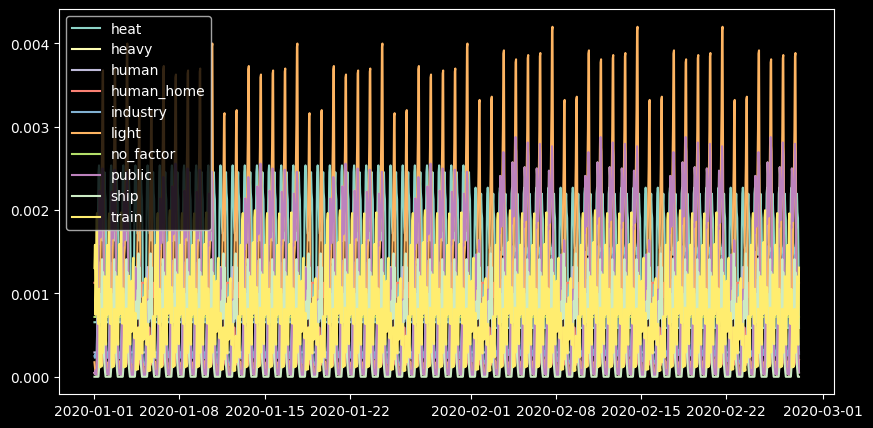

In [18]:
# We can create an hourly time series of each categories to plot
tss = {}
for categorie in yaml_profiles.keys():
    tss[categorie] = create_time_serie(
        start_time="2020-01-01",
        end_time="2020-02-28",
        profiles=yaml_profiles[categorie],
    )
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
for name, ts in tss.items():
    ax.plot(ts, label=name)
ax.legend()

In [26]:
# We can also save time profiles to yaml
for categorie in yaml_profiles.keys():
    yaml_file = emiproc.FILES_DIR / 'outputs' / f'test_{categorie}.yaml'
    to_yaml(yaml_profiles[categorie], yaml_file)


No profile found in yaml_file=WindowsPath('C:/Users/coli/Documents/emiproc/files/outputs/test_no_factor.yaml')
